### belkacem dounia 





### **" TP02: Amélioration du Contraste d'Images par Égalisation d'Histogramme Globale et Analyse des Résultats"**








## **1. Introduction**

L'égalisation d'histogramme est une technique fondamentale en TIM, utilisée pour améliorer le contraste d'une image en redistribuant les niveaux d'intensité.

---

## **2. Théories et Concepts**

### **2.1. Histogramme d'une image**

Un histogramme représente la distribution des niveaux de gris d'une image. Il permet d'analyser la répartition des intensités lumineuses et de détecter des problèmes comme un faible contraste.

### **2.2. Égalisation d'histogramme**

L'égalisation d'histogramme est une méthode qui redistribue les niveaux de gris pour occuper toute la plage dynamique disponible (typiquement [0, 255]). Cela améliore le contraste, en particulier pour les images où les niveaux de gris sont concentrés dans une plage étroite.

La transformation est définie par la fonction de distribution cumulative (CDF) normalisée :

$$
T(i) = \text{round}\left(\frac{\text{CDF}(i) - \text{CDF}_{\text{min}}}{\text{total pixels} - \text{CDF}_{\text{min}}} \times (L - 1)\right)
$$

où \( L \) est le nombre de niveaux de gris (256 pour une image 8 bits).

---

## **3. Méthodologie**

### **3.1. Étapes principales**

1. **Chargement de l'image** : Lecture de l'image et conversion en niveaux de gris.
2. **Calcul de l'histogramme** : Comptage des occurrences de chaque niveau de gris.
3. **Égalisation d'histogramme** :
   - Calcul de la CDF.
   - Normalisation de la CDF pour redistribuer les niveaux de gris.
4. **Visualisation des résultats** :
   - Affichage de l'image avant et après égalisation.
   - Comparaison des histogrammes.

---

## **4. Résultats**


- **Histogramme avant égalisation** : L'histogramme montre une concentration des niveaux de gris dans une plage étroite, indiquant un faible contraste.

- **Histogramme après égalisation** : L'histogramme est redistribué sur toute la plage dynamique, ce qui améliore le contraste de l'image.



## **5. Conclusion**

L'égalisation d'histogramme est une méthode efficace pour améliorer le contraste des images. Cependant, elle peut introduire des artefacts dans certaines régions de l'image, notamment lorsque les niveaux de gris sont très concentrés. Une approche locale, comme l'égalisation d'histogramme adaptative (CLAHE), pourrait être envisagée pour des résultats plus précis.


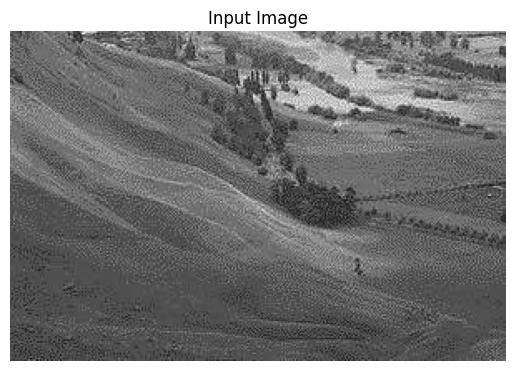

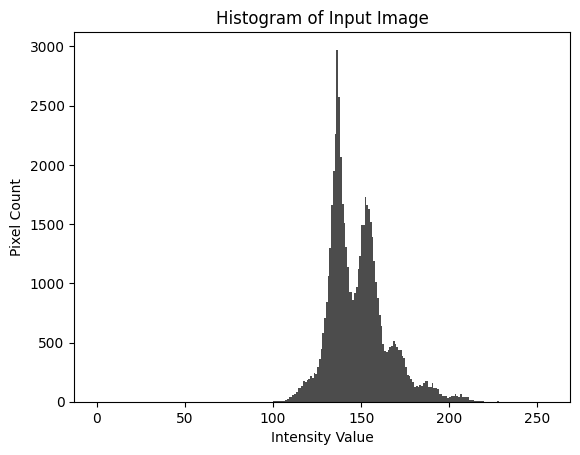

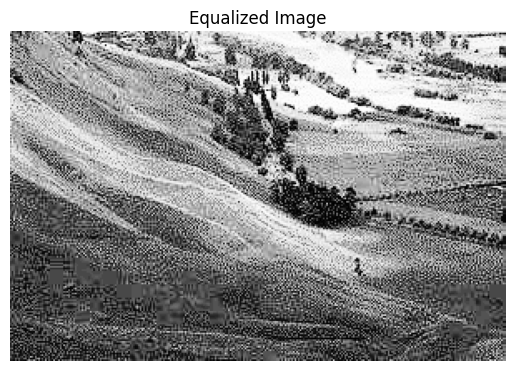

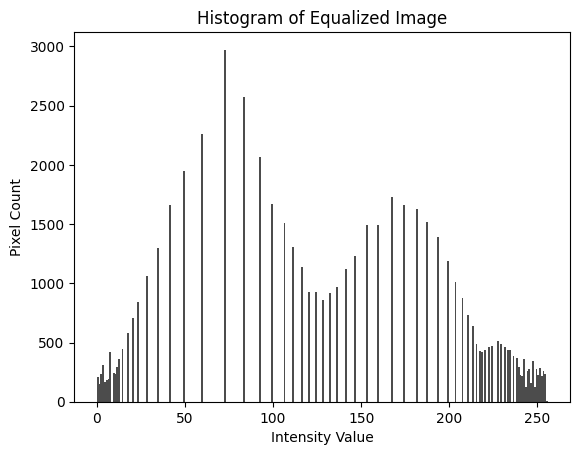

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def image_to_grayscale(image_path):
    image = Image.open(image_path)
    gray_image = image.convert("L")
    return gray_image

def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_histogram(image, title):
    plt.hist(np.array(image).flatten(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.show()

def histogram_equalization(image):
    
    image_array = np.array(image)
    
   
    histogram = [0] * 256
    for pixel in image_array.flatten():
        histogram[pixel] += 1
    
   
    c = [0] * 256
    c[0] = histogram[0]
    for i in range(1, 256):
        c[i] = c[i - 1] + histogram[i]
    
  
    c_normalized = [0] * 256
    total_pixels = image_array.size
    for i in range(256):
        c_normalized[i] = int(c[i] * 255 / total_pixels)
    
   
    image_equalized = np.zeros_like(image_array)
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            image_equalized[i, j] = c_normalized[image_array[i, j]]
    
    
    equalized_image = Image.fromarray(np.uint8(image_equalized))
    
    return equalized_image

image_path = r'C:\Users\DELL\Desktop\tp_tim\pics\blurred2.jpg'

gray_image = image_to_grayscale(image_path)
equalized_image = histogram_equalization(gray_image)

display_image(gray_image, "Input Image")
plot_histogram(gray_image, "Histogram of Input Image")

display_image(equalized_image, "Equalized Image")
plot_histogram(equalized_image, "Histogram of Equalized Image")